In [116]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [117]:
data = pd.read_excel('DengueData2022.xlsx')

In [118]:
df = data
data = data[:-17]

In [119]:
data['Day'] = pd.to_datetime(data['Day'])
data.set_index('Day', inplace=True)

C:\Users\aniki\AppData\Local\Temp/ipykernel_12812/2874150889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = pd.to_datetime(data['Day'])


In [120]:
p, d, q = 6, 1, 1  
P, D, Q, S = 6, 1, 1, 7

In [121]:
model = sm.tsa.SARIMAX(data['Affected'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


e:\Installation\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


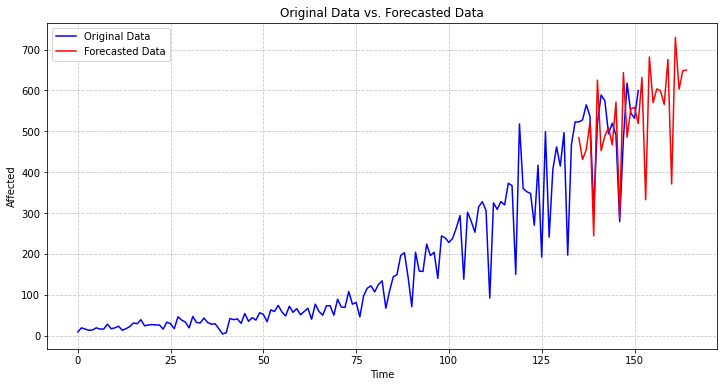

In [122]:
forecast_steps = 30
forecasted_values = results.forecast(steps=forecast_steps)


actual_values = df['Affected'].values


x_axis = range(len(actual_values))


plt.figure(figsize=(12, 6))
plt.plot(x_axis, actual_values, label='Original Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Affected')
plt.title('Original Data vs. Forecasted Data')
plt.grid(True, linestyle='--', alpha=0.7)


forecast_x_axis = range(data.shape[0] , data.shape[0] +forecast_steps)
plt.plot(forecast_x_axis, forecasted_values, label='Forecasted Data', color='red')
plt.legend()

plt.show()

In [123]:
predictions = results.get_prediction()
predicted_values = predictions.predicted_mean

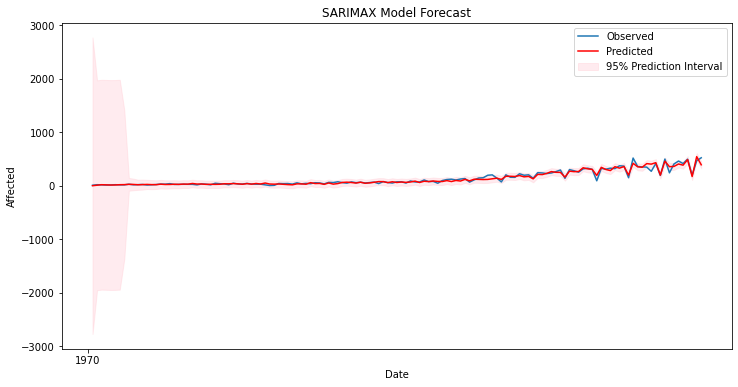

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Affected'], label='Observed')
plt.plot(predicted_values.index, predicted_values, color='red', label='Predicted')
plt.fill_between(predictions.conf_int().index, predictions.conf_int()['lower Affected'], predictions.conf_int()['upper Affected'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Affected')
plt.legend()
plt.title('SARIMAX Model Forecast')
plt.show()

In [125]:
predictions.conf_int()['upper Affected']

1970-01-01 00:00:00.000000001    2774.382113
1970-01-01 00:00:00.000000002    1972.595046
1970-01-01 00:00:00.000000003    1982.581305
1970-01-01 00:00:00.000000004    1979.599846
1970-01-01 00:00:00.000000005    1976.611372
                                    ...     
1970-01-01 00:00:00.000000131     450.107397
1970-01-01 00:00:00.000000132     554.100499
1970-01-01 00:00:00.000000133     237.538323
1970-01-01 00:00:00.000000134     609.642206
1970-01-01 00:00:00.000000135     457.191024
Freq: N, Name: upper Affected, Length: 135, dtype: float64

C:\Users\aniki\AppData\Local\Temp/ipykernel_12812/2800737350.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = pd.to_datetime(data['Day'])
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

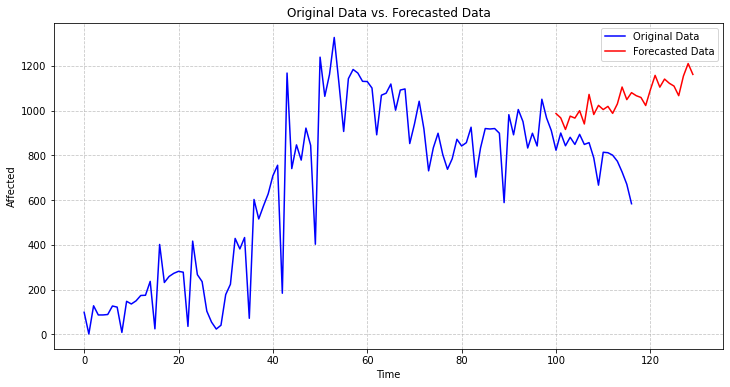

In [126]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_excel('DengueData2023.xlsx')
df = data
data = data[:-17]

# Ensure 'Day' column is in datetime format and set it as the index
data['Day'] = pd.to_datetime(data['Day'])
data.set_index('Day', inplace=True)

# Define your exogenous variable(s) if applicable
# If you have additional factors that influence the 'Affected' variable, include them here

# Define the SARIMA model
p = 6  # Order of the autoregressive (AR) component
d = 1  # Order of differencing
q = 1  # Order of the moving average (MA) component

P = 1  # Seasonal order of the AR component
D = 1  # Seasonal order of differencing
Q = 1  # Seasonal order of the MA component
S = 7  # Seasonal period (e.g., 7 for weekly data)

model = sm.tsa.SARIMAX(data['Affected'], order=(p, d, q), seasonal_order=(P, D, Q, S))

# Fit the SARIMAX model
results = model.fit()

# Forecast the last 20 data points
forecast_steps = 30
forecasted_values = results.forecast(steps=forecast_steps)

# Original data
actual_values = df['Affected'].values

# Create an array for the x-axis to plot both original and forecasted values
x_axis = range(len(actual_values))

# Plot the original data with all data points
plt.figure(figsize=(12, 6))
plt.plot(x_axis, actual_values, label='Original Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Affected')
plt.title('Original Data vs. Forecasted Data')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot the forecasted values for the last 20 data points
forecast_x_axis = range(100 , 100+forecast_steps)
plt.plot(forecast_x_axis, forecasted_values, label='Forecasted Data', color='red')
plt.legend()

plt.show()


In [127]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          Affected   No. Observations:                  100
Model:             SARIMAX(6, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -588.743
Date:                           Sat, 14 Oct 2023   AIC                           1197.485
Time:                                   09:54:26   BIC                           1222.703
Sample:                               01-01-1970   HQIC                          1207.664
                                    - 01-01-1970                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7230      0.168    -10.260      0.000      -2.052      -1.394
ar.L2         -1.1320      0.235     -4.816

e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'


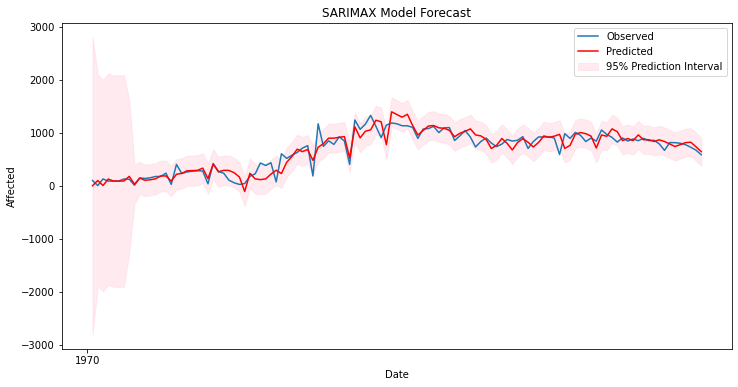

                                     SARIMAX Results                                     
Dep. Variable:                          Affected   No. Observations:                  117
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -692.642
Date:                           Sat, 14 Oct 2023   AIC                           1395.284
Time:                                   09:54:26   BIC                           1408.741
Sample:                               01-01-1970   HQIC                          1400.741
                                    - 01-01-1970                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2547      0.120     -2.121      0.034      -0.490      -0.019
ma.L1         -0.4890      0.116     -4.206

In [128]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_excel('DengueData2023.xlsx')

# Ensure 'Day' is in datetime format
data['Day'] = pd.to_datetime(data['Day'])
data.set_index('Day', inplace=True)

# Specify the SARIMA model parameters (p, d, q) and (P, D, Q, S) for seasonal component
p, d, q = 1, 1, 1  # Example values for non-seasonal orders
P, D, Q, S = 1, 1, 1, 7  # Example values for seasonal orders (assuming weekly seasonality)

# Fit the SARIMAX model
model = sm.tsa.SARIMAX(data['Affected'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Generate predictions for the dataset
predictions = results.get_prediction()
predicted_values = predictions.predicted_mean

# Plot the observed and predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Affected'], label='Observed')
plt.plot(predicted_values.index, predicted_values, color='red', label='Predicted')
plt.fill_between(predictions.conf_int().index, predictions.conf_int()['lower Affected'], predictions.conf_int()['upper Affected'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Affected')
plt.legend()
plt.title('SARIMAX Model Forecast')
plt.show()

# Summary of the model
print(results.summary())
